训练样本数量:686;特征属性数目:32,目标属性数目:4
测试样本数量:172
准确率:89.53%
Hinselmann目标属性AUC值: 0.9901974040021634
Schiller目标属性AUC值: 0.9559221200648998
Citology目标属性AUC值: 0.9637979989183343
Biopsy目标属性AUC值: 0.9568685776095187


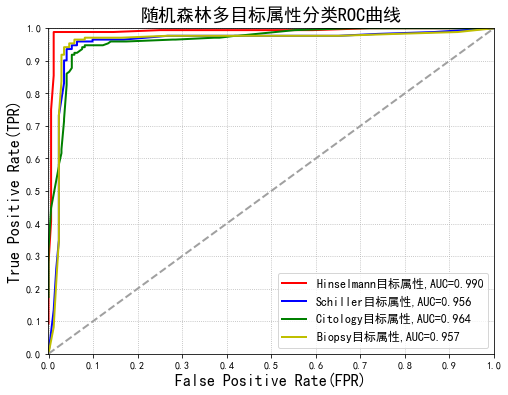

In [3]:
#!/usr/bin/env python
# -*- coding:utf-8 -*-
# Author:ZhengzhengLiu
# https://blog.csdn.net/loveliuzz/article/details/78755416
 
#随机森林——宫颈癌分类
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import label_binarize
from sklearn.decomposition import PCA
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
 
#解决中文显示问题
mpl.rcParams['font.sans-serif']=[u'simHei']
mpl.rcParams['axes.unicode_minus']=False
 
##导入数据
names = [u'Age', u'Number of sexual partners', u'First sexual intercourse',
       u'Num of pregnancies', u'Smokes', u'Smokes (years)',
       u'Smokes (packs/year)', u'Hormonal Contraceptives',
       u'Hormonal Contraceptives (years)', u'IUD', u'IUD (years)', u'STDs',
       u'STDs (number)', u'STDs:condylomatosis',
       u'STDs:cervical condylomatosis', u'STDs:vaginal condylomatosis',
       u'STDs:vulvo-perineal condylomatosis', u'STDs:syphilis',
       u'STDs:pelvic inflammatory disease', u'STDs:genital herpes',
       u'STDs:molluscum contagiosum', u'STDs:AIDS', u'STDs:HIV',
       u'STDs:Hepatitis B', u'STDs:HPV', u'STDs: Number of diagnosis',
       u'STDs: Time since first diagnosis', u'STDs: Time since last diagnosis',
       u'Dx:Cancer', u'Dx:CIN', u'Dx:HPV', u'Dx', u'Hinselmann', u'Schiller',
       u'Citology', u'Biopsy']#df.columns
 
path = "risk_factors_cervical_cancer.csv"  # 数据文件路径
data = pd.read_csv(path)
#数据分割
X = data[names[0:-4]]
Y = data[names[-4:]]
 
#异常值处理
X = X.replace("?",np.NaN)
imputer = Imputer(missing_values="NaN")     #使用Imputer给定缺省值，默认以列的mean
X = imputer.fit_transform(X,Y)
 
#数据分割
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)
print("训练样本数量:%d;特征属性数目:%d,目标属性数目:%d" %(x_train.shape[0],x_train.shape[1],y_train.shape[1]))
print("测试样本数量:%d" %x_test.shape[0])
 
#数据标准化
ss = MinMaxScaler()     #分类模型经常使用的是MinMaxScaler归一化，回归模型经常用StandardScaler
x_train = ss.fit_transform(x_train,y_train)
x_test = ss.transform(x_test)
 
#降维
pca = PCA(n_components=2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
 
#随机森林模型
#max_depth 一般不宜设置过大，将每一个模型设置为一个弱分类器
forest =  RandomForestClassifier(n_estimators=100,criterion="gini",max_depth=1,random_state=0)
forest.fit(x_train,y_train)
 
#模型效果评估
score = forest.score(x_test,y_test)
print("准确率:%.2f%%" %(score*100))
 
#模型预测（返回测试集中每个测试样例，分类为每个类的概率）
forest_y_score = forest.predict_proba(x_test)      #predict_proba:输出概率
 
#计算ROC值
#ravel将多维数组降为一维，
forest_fpr1,forest_tpr1,_ = metrics.roc_curve(label_binarize(y_test[names[-4]],classes=(0,1,2)).T[0:-1].T.ravel(),forest_y_score[0].ravel())
forest_fpr2,forest_tpr2,_ = metrics.roc_curve(label_binarize(y_test[names[-3]],classes=(0,1,2)).T[0:-1].T.ravel(),forest_y_score[1].ravel())
forest_fpr3,forest_tpr3,_ = metrics.roc_curve(label_binarize(y_test[names[-2]],classes=(0,1,2)).T[0:-1].T.ravel(),forest_y_score[2].ravel())
forest_fpr4,forest_tpr4,_ = metrics.roc_curve(label_binarize(y_test[names[-1]],classes=(0,1,2)).T[0:-1].T.ravel(),forest_y_score[3].ravel())
 
#计算AUC值
auc1 = metrics.auc(forest_fpr1,forest_tpr1)
auc2 = metrics.auc(forest_fpr2,forest_tpr2)
auc3 = metrics.auc(forest_fpr3,forest_tpr3)
auc4 = metrics.auc(forest_fpr4,forest_tpr4)
 
print("Hinselmann目标属性AUC值:",auc1)
print("Schiller目标属性AUC值:",auc2)
print("Citology目标属性AUC值:",auc3)
print("Biopsy目标属性AUC值:",auc4)
 
#画图
plt.figure(figsize=(8, 6), facecolor='w')
plt.plot(forest_fpr1,forest_tpr1,c='r',lw=2,label=u'Hinselmann目标属性,AUC=%.3f' % auc1)
plt.plot(forest_fpr2,forest_tpr2,c='b',lw=2,label=u'Schiller目标属性,AUC=%.3f' % auc2)
plt.plot(forest_fpr3,forest_tpr3,c='g',lw=2,label=u'Citology目标属性,AUC=%.3f' % auc3)
plt.plot(forest_fpr4,forest_tpr4,c='y',lw=2,label=u'Biopsy目标属性,AUC=%.3f' % auc4)
plt.plot((0,1),(0,1),c='#a0a0a0',lw=2,ls='--')
plt.xlim(-0.001, 1.001)
plt.ylim(-0.001, 1.001)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.yticks(np.arange(0, 1.1, 0.1))
plt.xlabel('False Positive Rate(FPR)', fontsize=16)
plt.ylabel('True Positive Rate(TPR)', fontsize=16)
plt.grid(b=True, ls=':')
plt.legend(loc='lower right', fancybox=True, framealpha=0.8, fontsize=12)
plt.title(u'随机森林多目标属性分类ROC曲线', fontsize=18)
plt.savefig("随机森林多目标属性分类ROC曲线.png")
plt.show()
 
# 运行结果：
# 训练样本数量:686;特征属性数目:32,目标属性数目:4
# 测试样本数量:172
# 准确率:89.53%
# Hinselmann目标属性AUC值: 0.990197404002
# Schiller目标属性AUC值: 0.955922120065
# Citology目标属性AUC值: 0.963797998918
# Biopsy目标属性AUC值: 0.95686857761
